# Lab 3

Welcome to your third lab! This notebook contains all the code and comments that you need to submit. Labs are two weeks long and the places where you need to edit are highlighted in red. Feel free to add in your own markdown for additional comments.

__Submission details: make sure you have run all your cells from top to bottom (you can click _Kernel_ and _Restart Kernel and Run All Cells_). Submit this Jupyter Notebook and also submit the .py file that is generated.__

In [1]:
## This code snippet does not need to be edited

from python_environment_check import check_packages
from python_environment_check import set_background

## Colour schemes for setting background colour
white_bgd = 'rgba(0,0,0,0)'
red_bgd = 'rgba(255,0,0,0.2)'

[OK] Your Python version is 3.8.10 (default, Mar 15 2022, 12:22:08) 
[GCC 9.4.0]


In [2]:
## Code snippets in red (similar to this) is where you need to edit your answer)
# Set your student ID and name here:

student_number = 31975658  # 12345678
student_name = "Sihan Ren" # "John Doe"

set_background(red_bgd)

## What you are going to do in this lab exercise!

In this laboratory exercise, you will create algorithms to train non-linear models using MLPs. 

In all of the tasks below, you should use PyTorch Lightning to design, train and test MLP models. You can use any pre-written libraries like matplotlib, pandas and numpy to visualize your results. 

<div class="alert alert-block alert-warning">
    
- **Section 1** :  Approximate the sine function.
- **Section 2** : Design a shallow MLP for the fashion MNIST
- **Section 3** : Comparing the performance of Shallow MLP vs Deep MLP.
    
</div>

## Section 1 : Approximate the sine function

<div class="alert alert-block alert-info">

## What you should do in this task!

In this section, we will approximate the sine function with a neural network to get a sense of how architecture and hyperparameters affect neural network performance. 
    
#### In this task, you will work on the following points:
 1. As the first step you should have PyTorch and PyTorch-Lightning installed in your local machine. We have given you the set of necessary libraries and details on PyTorch functionalities that you need to use when implementing algorithm for Task 1. The first sub task is to create your custom dataset using PyTorch datasets and dataloaders.
    
 2. Define the custom dataset class (i.e., Train and Test datasets) and visualize the train dataset you've created.
    
 3. Design the Shallow Linear MLP model using PyTorch Lightning Module.
    
 4. Train and evaluate the MLP model on defined train dataset and test dataset.
    
 5. Visualize experimental results using Matplotlib.


Before approaching, we will be introducing Pytorch Lightning Neural Network structure, Pytorch datasets, dataloaders and optimizers.

<img src="./figures/sine_wave.gif" width="1200" align="center">

## PyTorch & PyTorch-Lightning Installation

What are the differences between PyTorch and PyTorch-Lightning?

PyTorch is based on the Torch library, adapted for Python. PyTorch is a deep learning library that allows you to have greater control of your neural network architecture, and have a lot more customisable hyper parameters / functions (such as the loss function etc.) compared to other deep learning frameworks such as TensorFlow / Keras.

PyTorch-Lightning is a higher level of PyTorch, meaning that it is easier to use and run models on compared to the original PyTorch. There are methods that are already built into the classes for PyTorch-Lightning which you don't have to worry about as much, and takes away a lot of the additional considerations such as passing your dataset via CUDA, hence PyTorch-Lightning code will look simpler than PyTorch!

As the first step we import all the necessary libraries needed to implement these lab tasks. 

Note: Do not modify seed values or use any other libraries.

In [3]:
# If you run on Jupyter Lab uncomment bellow comment
! pip install --quiet "matplotlib" "pytorch-lightning" "pandas" "torchmetrics" 
! pip install --ignore-installed "PyYAML"

# If you run on google colab uncomment bellow comment
! pip install --quiet "matplotlib" "pytorch-lightning" "pandas" "torchmetrics"
import numpy as np
import random
import matplotlib.pyplot as plt

import pytorch_lightning as pl
import torch 
import torch.nn as nn 
import torchmetrics
from torchmetrics import Accuracy

# For reproducability
torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

# Define GPU number
GPU_indx = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.9.1 requires tensorboard<2.10,>=2.9, but you'll have tensorboard 2.10.0 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
  Using cached PyYAML-6.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (701 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
/shared-libs/python3.8/py/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/

In [4]:
# add imports
import torchvision

<h2> Pytorch Datasets and Dataloaders </h2>

Pytorch has a huge number of functionalities that make training our neural networks very easy! One of those functionalities is the Pytorch dataset and dataloader (they are real life-savers!). In depth review on PyTorch Datasets and Dataloaders are covered in Lectures!

In order to load datasets, we will use torchvision module and to create a dataloader, we will use sub module of torch as follows.

**from torch.utils.data import DataLoader**

Under torchvision datasets you can find popular datasets that are frequently used for machine learning/deep learning tasks (eg., MNIST, SVHN, CIFAR10, CIFAR100 etc). You can create your own custom dataset using torchvision dataset in built functionalities and in this task we will show how to load custom datasets.

In [5]:
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

### 1.1 Creating a Pytorch dataset

The dataset you are going to be creating will be points from a "noisy" sine wave. To create the custom dataset, you can use PyTorch dataset inbuilt functionalities. <br>


The Pytorch dataset class has three essential parts:<br>
1. The \__init__ function (as most Python classes do)<br>
2. The \__getitem__ function (this is called during every iteration)<br>
3. The \__len__ function (this must return the length of the dataset)

**Remember! The "self" within classes will become attributes of that class that you can use within other methods that are defined for that class. If you defined an attribute without self.<\name>, then that attribute cannot be used for other methods.**

Make sure to follow all inline comments specified for each code fragment that you need to work on.

In [6]:
set_background(red_bgd)

# Create a "SineDataset" class by importing the Pytorch Dataset class

class SineDataset(Dataset):
    """ Data noisy sinewave dataset
        num_datapoints - the number of datapoints you want
    """
    def __init__(self, num_datapoints):
        # Lets generate the noisy sinewave points
        
        # Create "num_datapoints" worth of random x points using a uniform distribution (0-1) using torch.rand
        # Then scale and shift the points to be between -9 and 9
        self.x_data = torch.rand(num_datapoints) 
        self.x_data = self.x_data * 18 - 9
        # Calculate the sin of all data points in the x vector and the scale amplitude
        # Scale the amplitude by diving by 2.5
        self.y_data = torch.sin(self.x_data) / 2.5
        
        # Add some gaussein noise to each datapoint using torch.randn_like
        # Note:torch.randn_like will generate a tensor of gaussein noise the same size 
        # and type as the provided tensor
        # Divide the randomly generated values by 20 (so it is less noisy)
        self.y_data += torch.randn_like(self.y_data) / 20

    def __getitem__(self, index):
        # This function is called by the dataLOADER class whenever it wants a new mini-batch
        # The dataLOADER class will pass the dataSET and number of datapoint indexes (mini-batch of indexes)
        # It is up to the dataSET's __getitem__ function to output the corresponding input datapoints 
        # AND the corresponding labels
        return self.x_data[index], self.y_data[index]
        # Note:Pytorch will actually pass the __getitem__ function one index at a time
        # If you use multiple dataLOADER "workers" multiple __getitem__ calls will be made in parallel
        # (Pytorch will spawn multiple threads)

    def __len__(self):
        # We also need to specify a "length" function, Python will use this fuction whenever
        # You use the Python len(function)
        # We need to define it so the dataLOADER knows how big the dataSET is!
        return self.x_data.shape[0]

### 1.2 Create instances from defined custom dataset and visualize the training dataset

Now that you've defined your dataset, lets create an instance of it for training and testing and then create dataloaders to make it easy to iterate.

In [7]:
set_background(red_bgd)

n_x_train = 30000   # the number of training datapoints
n_x_test = 8000     # the number of testing datapoints
BATCH_SIZE = 16     # the batch size for task 1

# Create an instance of the SineDataset for both the training and test set 
# (Here we have only training and test set. Therefore consider validation set also equals to test set)
dataset_train = SineDataset(n_x_train) 
dataset_test  = SineDataset(n_x_test)

# Now we need to pass the dataset to the Pytorch dataloader class along with some other arguments
# batch_size - the size of our mini-batches
# shuffle - whether or not we want to shuffle the dataset 
# For training shuffle is set to True and for Testing/Validation shuffle is set to False
data_loader_train = DataLoader(dataset = dataset_train, shuffle = True, batch_size = BATCH_SIZE, num_workers = 0, pin_memory = False)
data_loader_test = DataLoader(dataset = dataset_test, shuffle = False, batch_size = BATCH_SIZE, num_workers = 0, pin_memory = False)

In [8]:
set_background(red_bgd)

## Why is it neccessary for us to shuffle the training, and not shuffle validation/test?

# Shuffle the training dataset imporves model accuracy. If we don't shuffle the training samples,
# we may get sets which are all ones or zeros, it becomes training model to fit 1 or 0. So shuffle the 
# training dataset fit the purpose which is predict both 1s and 0s.



Now visualise the dataset you've created!!

Note: see here how we can just directly access the data from the dataset class. Make sure your generated sinewave matches the described sinewave within the dataset class!. 

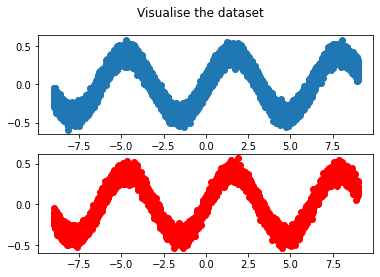

In [9]:
set_background(red_bgd)

# Visualize dataset using matplotlib scatter plot
fig, ax = plt.subplots(2, 1)

x1, y1 = dataset_train[:]
ax[0].scatter(x1, y1)

x2, y2 = dataset_test[:]
ax[1].scatter(x2, y2, c = 'r')

fig.suptitle('Visualise the dataset')
plt.show()




## Now, let's design a Neual Network and Train it!

<h2> Neural Network Architecture</h2>

Up until now we have only created a single linear layer with an input layer and an output layer. In this Lab you will start to create multi-layered networks with many "hidden" layers separated by "activation functions" that give our networks "non-linearities". If we didn't have these activation functions and simple stacked layers together, our network would be no better than a single linear layer! Why? Because multiple sequential "linear transformations" can be modeled with just a single linear transformation. 

Neural networks are associated with a Directed Acyclic Graphs (DAG) describing how the functions are composed together. For example, we might have three functions $f^{(1)}, f^{(2)}$, and $f^{(3)}$, connected in a chain, to form in a chain, to form  $f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x))).$ In this case, $f^{(1)}$ is called the first layer of the network, $f^{(2)}$ is called the second layer, and so on.  The ﬁnal layer of a feedforward network is called the output layer.

Except the output layer, the behavior of the other layers is not directly speciﬁed by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data do not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of $f^*$. Because the training data does not show the desired output for each of these layers, and they
are called hidden layers. These hidden layers, receive input from many other units and computes its own activation value. This requires us to choose the activation functions that will be used to compute the hidden layer values.

So what are these nonlinear activation functions that turn our simple linear models into a power "nonlinear function approximator"? Some common examples are:<br>
1. relu
2. sigmoid
3. tanh

<h3>Pytorch Lightning Module</h3>

Now we can define a Pytorch Lightning model to be trained!<br>
To do so, here you need to use the Pytorch LightningModule class as the base for defining your network. Just like the dataset class, this class has a number of important functions.
A LightningModule is a PyTorch nn.Module and it has a few more helpful features.

In [10]:
import os
import pandas as pd

from IPython.core.display import display
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from IPython.display import clear_output
from pytorch_lightning.callbacks import Callback, ModelCheckpoint

/tmp/ipykernel_173/1283516584.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [11]:
# update
from torchmetrics import MeanSquaredError

### 1.3 Design the Shallow Linear MLP model using PyTorch Lightning Module

Design a two layer Shallow MLP model and train it with both SGD and Adam optimizers. 

In [12]:
set_background(red_bgd)

class ShallowLinear(LightningModule):
    def __init__(self, hidden_size=[1, 64, 1], learning_rate=1e-2, optimizer="SGD"):

        super().__init__()
        
        # Set our init args as class attributes, you can look at the PDF for the info
        self.learning_rate = learning_rate # Learning rate
        self.loss_fn = nn.MSELoss() # Use MSE loss as cost function
        self.optimizer = optimizer # Optimizer
        
        D_in, H, D_out = hidden_size
        
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
        self.test_accuracy = MeanSquaredError()
        self.train_accuracy = MeanSquaredError()
        self.val_accuracy = MeanSquaredError()
    
    def forward(self, x):
        # This function is an important one and we must create it or pytorch will give us an error!
        # This function defines the "forward pass" of our neural network
        
        #Lets define the sqeuence of events for our forward pass!
        x = x.unsqueeze(1)
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x) # activation function --> use tanh

        #No activation function on the output!!
        y = self.linear2(x) # output layer
        
        #Note we re-use the variable x as we don't care about overwriting it 
        #though in later labs we will want to use earlier hidden layers
        #later in our network!
        return y.squeeze(1)

    def training_step(self, batch, batch_idx):
        # Write training step
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
       
        self.train_accuracy.update(logits, y)

        self.log("train_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("train_acc", self.train_accuracy, prog_bar = True, on_step = False, on_epoch = True)
        return loss    
    
    def validation_step(self, batch, batch_idx):
        # Write validation step
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        
        self.val_accuracy.update(logits, y)
    
        self.log("val_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("val_acc", self.val_accuracy, prog_bar = True, on_step = False, on_epoch = True)

    def test_step(self, batch, batch_idx):
        # Write testing step
        x, y = batch 
        logits = self(x)
        loss = self.loss_fn(logits, y)
        
        self.test_accuracy.update(logits, y)

        self.log("test_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("test_acc", self.test_accuracy, prog_bar = True, on_step = False, on_epoch = True)

    def predict_step(self, batch, batch_idx):
        # Write predict step
        x, y = batch
        return x, self(x)
    
    def configure_optimizers(self):
        # Return Adam or SGD optimizer
        if self.optimizer == 'SGD':
            optimizer = torch.optim.SGD(self.parameters(), lr = self.learning_rate)
        elif self.optimizer == 'Adam':
            optimizer = torch.optim.Adam(self.parameters(), lr = self.learning_rate)       
        return optimizer
    
    def train_dataloader(self):
        return data_loader_train
    
    def val_dataloader(self):
        return data_loader_test

    def test_dataloader(self):
        return data_loader_test

### 1.4 Define training and testing methods for models

By using the Trainer Constructor you can train and test the model.
Also Trainer will automatically enables: 
1. Tensorboard logging 
2. Model checkpointing 
3. Training and validation loop 
4. early-stopping

In this task, we will test the model performance for both optimizers:
- SGD
- ADAM


In [13]:
set_background(red_bgd)

# Initialize Model with SGD optimizer
model_sgd = ShallowLinear(learning_rate = 1e-2, optimizer = 'SGD')
# Train model for 20 epochs
trainer_task1_SGD = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=20,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger(save_dir="logs_task1_SGD/"),
)
trainer_task1_SGD.fit(model_sgd, data_loader_train, data_loader_test)

# Evaluate Model
trainer_task1_SGD.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fn        | MSELoss          | 0     
1 | linear1        | Linear           | 128   
2 | linear2        | Linear           | 65    
3 | test_accuracy  | MeanSquaredError | 0     
4 | train_accuracy | MeanSquaredError | 0     
5 | val_accuracy   | MeanSquaredError | 0     
----------------------------------------------------
193       Trainable params
0         Non-trainable params
193       Total params
0.001     Total estimated model params size (MB)
                                                                            /usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:225: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Con

[{'test_loss': 0.009513421915471554, 'test_acc': 0.009513421915471554}]

If your implementation is correct, you should obtain a printed output similar to this:

[{'test_loss': 0.009513414464890957}]

In [14]:
set_background(red_bgd)

# Initialize Model with Adam optimizer
model_adam = ShallowLinear(learning_rate = 1e-3, optimizer = 'Adam')

# Train model for 20 epochs
trainer_task1_ADAM = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=20,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger(save_dir="logs_task1_Adam/"),
)
trainer_task1_ADAM.fit(model_adam, data_loader_train, data_loader_test)

# Evaluate Model
trainer_task1_ADAM.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fn        | MSELoss          | 0     
1 | linear1        | Linear           | 128   
2 | linear2        | Linear           | 65    
3 | test_accuracy  | MeanSquaredError | 0     
4 | train_accuracy | MeanSquaredError | 0     
5 | val_accuracy   | MeanSquaredError | 0     
----------------------------------------------------
193       Trainable params
0         Non-trainable params
193       Total params
0.001     Total estimated model params size (MB)
Epoch 0:  78%|███████▊  | 1860/2375 [00:06<00:01, 277.58it/s, loss=0.0134, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 1:  78%|███████▊  | 1860/2375 [00:05<00:01, 317.97it/s, loss=0.0114, v_num=2, val_loss=0.0144, val_acc=0.0144, train_loss=0.0287, train_acc=0.0287]
Validation: 0it [0

[{'test_loss': 0.005056167487055063, 'test_acc': 0.005056167487055063}]

If your implementation is correct, you should obtain a printed output similar to this:

[{'test_loss': 0.005056165624409914}]

### 1.5 Generate scatter plots for above two trained models to compare noisy datapoints and denoised predictions

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/trainer.py:1386: UserWarning: `.predict(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.predict(ckpt_path='best')` to use the best model or `.predict(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at logs_task1_SGD/lightning_logs/version_4/checkpoints/epoch=19-step=37500.ckpt
Loaded model weights from checkpoint at logs_task1_SGD/lightning_logs/version_4/checkpoints/epoch=19-step=37500.ckpt
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:225: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve perfo

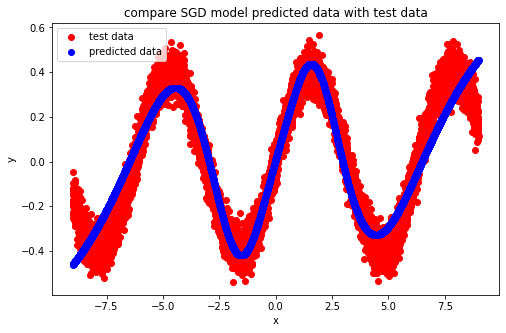

In [15]:
set_background(red_bgd)

# Scatter plot for model trained using SGD (call predict function)
predictions_sgd = trainer_task1_SGD.predict(dataloaders = data_loader_test)
plt.figure(figsize = (8, 5))
x, y = dataset_test[:]
plt.scatter(x, y, c = 'r')
for i in range(len(predictions_sgd)):
    x_pred, y_pred = predictions_sgd[i]
    plt.scatter(x_pred, y_pred, c = 'b')
plt.title('compare SGD model predicted data with test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['test data', 'predicted data'])
plt.show()

In [16]:
predictions_adam = trainer_task1_ADAM.predict(dataloaders = data_loader_train)

Restoring states from the checkpoint path at logs_task1_Adam/lightning_logs/version_2/checkpoints/epoch=19-step=37500.ckpt
Loaded model weights from checkpoint at logs_task1_Adam/lightning_logs/version_2/checkpoints/epoch=19-step=37500.ckpt
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:478: PossibleUserWarning: Your `predict_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
Predicting DataLoader 0: 100%|██████████| 1875/1875 [00:01<00:00, 1343.69it/s]


Restoring states from the checkpoint path at logs_task1_Adam/lightning_logs/version_2/checkpoints/epoch=19-step=37500.ckpt
Loaded model weights from checkpoint at logs_task1_Adam/lightning_logs/version_2/checkpoints/epoch=19-step=37500.ckpt
Predicting DataLoader 0: 100%|██████████| 500/500 [00:00<00:00, 1455.72it/s]


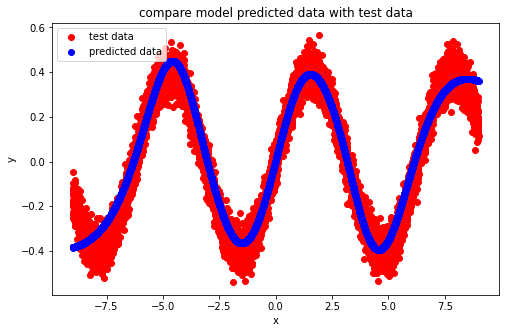

In [17]:
set_background(red_bgd)

# Scatter plot for model trained using Adam (call predict function)
predictions_adam = trainer_task1_ADAM.predict(dataloaders = data_loader_test)
plt.figure(figsize = (8, 5))
x, y = dataset_test[:]
plt.scatter(x, y, c = 'r')
for i in range(len(predictions_adam)):
    x_pred, y_pred = predictions_adam[i]
    plt.scatter(x_pred, y_pred, c = 'b')
plt.title('compare model predicted data with test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['test data', 'predicted data'])
plt.show()

### 1.6 Visualize experimental results

Pytorch-lightning module has its own built in methods to log values. These log files can be then used to visualize experimental results. You can use python plotting libraries such as matplotlib.

Using those logs, plot train losses for models trained on SGD and Adam.

Note: Make sure to drop NaN entries from dataframes before you plot using matplotlib.

You can read the logs by using the pandas library (pd.read_csv)

In [18]:
set_background(red_bgd)

# read logs for model trained with SGD
SGD_train_data = pd.read_csv(trainer_task1_SGD.logger.log_dir + "/metrics.csv")
SGD_train_data.set_index("epoch", inplace = True)
SGD_train_data = SGD_train_data.groupby(level = 0).sum().drop("step", axis = 1)
# read logs for model trained with Adam
Adam_train_data = pd.read_csv(trainer_task1_ADAM.logger.log_dir + "/metrics.csv")
Adam_train_data.set_index("epoch", inplace = True)
Adam_train_data = Adam_train_data.groupby(level = 0).sum().drop("step", axis = 1)

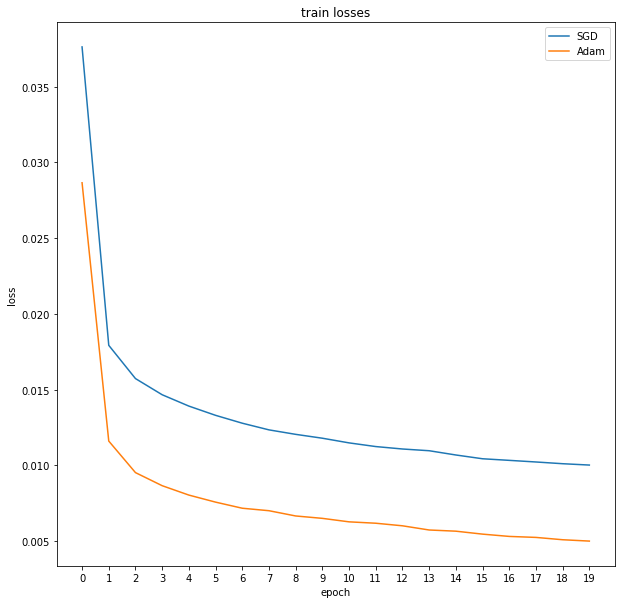

In [19]:
set_background(red_bgd)

# Visualize train losses for model trained with SGD and Adam
plt.figure(figsize = (10, 10))
plt.plot(SGD_train_data['train_loss'])
plt.plot(Adam_train_data['train_loss'])
plt.xticks(np.arange(0, 20, step = 1))
plt.title('train losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['SGD', 'Adam'])
plt.show()


### 1.7 Analysing above results, what optimizer you will choose? Explain why?

In [20]:
set_background(red_bgd)

# I choose Adam as my optimizer, because it always has less loss in same epoch time,
# especially  when epoch times increase. It's closer to real sin wave. 

### 1.8 Discuss why this simple shallow network is able to denoise noisy data and approximate sine function ?

In [ ]:
set_background(red_bgd)

# Because orginal function is a simple linear function which has few parameters and noise is very low.

## Section 2 & 3 : Compare Shallow MLP and Deep MLP


<div class="alert alert-block alert-info">

## What you should do these sections 2 and 3!!

In sections 2 and 3 you will be training a Shallow MLPs and Deep MLPs for classifying images on the data file "section2_data.npz" which is the Fashion-MNIST dataset that contains images and labels for training, validation and test purposes (The images are 28x28 grayscale images).

You have to use Pytorch inbuilt datasets, Pytorch Lightning module class to construct a MLP in order to perform training and testing on the given datasets using stochastic gradient descent (SGD).
    
#### In you will work on the following points:
 1. Create training, validation and testing dataloaders.
 2. Visualize training datasets.
 3. Design shallow neural network model.
 4. Perform training the model and evaluation for different settings. Report test accuracies.
 5. Visualize experimental results for training losses.
 6. Visualize experimental results for validation accuracies.
 7. Visualize predictions.
 8. Optimize Shallow network's performance.
    
    
#### In section 3 you will work on the following points:
 1. Design deep neural network model.
 2. Perform training the model and evaluation for different settings. Report test accuracies.
 3. Visualize experimental results for training loss vs Validation accuracy.
 4. Visualize predictions.
 5. Discussion on experimental results.

<img src="figures/shallow_deep_mlp.png" width="1200" align="center">
    
In the above figure A is a shallow neural network and B is a deep neural network.
    
Note:  In all the parts below, you should only use the training images and their labels to train your model. You may use the **validation set** to pick a trained model. For example, during training, you can test the accuracy of your model using the validation set every epoch and pick the model that achieves the highest validation accuracy. You should then report your results on the test set once you choose your model.


### 2.1 Create custom dataloader

The following class reads the data for section 2 & 3 tasks and creates a torch dataset object for it. With this, you can easily 
use a dataloader to train your model. 

Note: Make sure that the file "section2_data.npz" is located properly (in this example, it should be in the same folder as this notebook).

In [22]:
import torchvision

# For reproducability
torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
BATCH_SIZE = 100 

In [23]:
# see what is inside the 'section2_data.npz'.
data = np.load('section2_data.npz')
print('This file has:', data.files)
x = data['arr_0']
y = data['arr_1']
print('images data shape:', x.shape)
print('labels data shape:', y.shape)

This file has: ['arr_0', 'arr_1', 'arr_2', 'arr_3', 'arr_4', 'arr_5']
images data shape: (784, 8000)
labels data shape: (8000,)


In [24]:
set_background(red_bgd)

class Section3Data(Dataset):
    def __init__(self, trn_val_tst = 0):
        # Load numpy data
        data = np.load('section2_data.npz')
        if trn_val_tst == 0:
            # Create dataset for trainloader --> images arr_0, labels arr_1
            self.images = data['arr_0']
            self.labels = data['arr_1']
        elif trn_val_tst == 1:
            # Create dataset for valloader --> images arr_2, labels arr_3
            self.images = data['arr_2']
            self.labels = data['arr_3']
        else:
            # Create dataset for testloader --> images arr_4, labels arr_5
            self.images = data['arr_4']
            self.labels = data['arr_5']
            
        # Normalize images [0,1]  
        self.images = self.images.T
        self.images = (self.images - self.images.min()) / (self.images.max() - self.images.min())

    # Define len function
    def __len__(self):
        return len(self.labels)

    # Define getitem function
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
   
        sample = self.images[idx,:]
        labels = self.labels[idx]
        return sample, labels

Now using dataset class create a dataloader for the section 3 data.

In [25]:
set_background(red_bgd)

# Call training dataset and create the trainloader
trainset = Section3Data()
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)

# Call validation dataset and create the trainloader
valset = Section3Data(1)  
valloader = DataLoader(valset, batch_size = BATCH_SIZE, shuffle = False)

# Call testing dataset and create the trainloader
testset = Section3Data(2)  
testloader = DataLoader(testset, batch_size = BATCH_SIZE, shuffle = False)

### 2.2 Visualize dataset

Lets visualise that mini-batches that the training dataloader gives us.

The size of data: torch.Size([100, 1, 28, 28])
The size of labels: torch.Size([100])


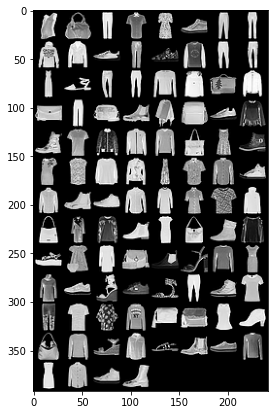

In [26]:
set_background(red_bgd)
  

# We can create an iterater using the dataloaders and take a random sample 
trainloader_iter = iter(trainloader)
data, labels = trainloader_iter.next()
data = data.reshape(100, 1, 28, 28)
print('The size of data:', data.shape)
print('The size of labels:', labels.shape)

grid = torchvision.utils.make_grid(data)
plt.figure(figsize = (7, 7))
plt.imshow(grid.permute(1, 2, 0))
plt.show()
# visualize dataset using torchvision grid

### 2.3 Design Shallow MLP

Design a Shallow MLP with one hidden linear layer.

In [27]:
set_background(red_bgd)

class Shallow_MLP(LightningModule):
    def __init__(self, n, learning_rate=1e-1):
        super().__init__()
        
        self.learning_rate = learning_rate
        self.loss_fun = nn.CrossEntropyLoss() # Use CE loss
        
        self.linear1 =  nn.Linear(784, n)
        self.linear2 =  nn.Linear(n, 10)
        
        self.train_accuracy = Accuracy()
        self.val_accuracy = Accuracy()
        self.test_accuracy = Accuracy()
            
    def forward(self, x):
        #Pass input through conv layers
        bs = x.shape[0]
        x = x.reshape(bs, -1).float()
        out1 = torch.tanh(self.linear1(x))
        out2 = self.linear2(out1)
    
        return out2
    
    def training_step(self, batch, batch_idx):
        # Write training step
        x, y = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)
        pred = logits.argmax(1)
        self.train_accuracy.update(pred, y)
        self.log("train_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("train_acc", self.train_accuracy, prog_bar = True, on_step = False, on_epoch = True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        # Write validation step
        x, y = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)
        pred = logits.argmax(1)
        self.val_accuracy.update(pred, y)
        self.log("val_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("val_acc", self.val_accuracy, prog_bar = True, on_step = False, on_epoch = True)

    def test_step(self, batch, batch_idx):
        # Write testing step
        x, y = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)
        pred = logits.argmax(1)
        self.test_accuracy.update(pred, y)
        self.log("test_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("test_acc", self.test_accuracy, prog_bar = True, on_step = False, on_epoch = True)
        
    def predict_step(self, batch, batch_idx):
        # Write predict step
        x, y = batch
        logits = self(x)
        pred = logits.argmax(1)
        return y, pred
        
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    def train_dataloader(self):
        return trainloader
    
    def val_dataloader(self):
        return valloader

    def test_dataloader(self):
        return testloader

### 2.4 Train and evaluate model's performance for following scenarios

a. fc1 : Linear(784 $\times$ 32) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(32 x$\times$ 10)

b. fc1 : Linear(784 $\times$ 128) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(128 $\times$ 10)

c. fc1 : Linear(784 $\times$ 512) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(512 $\times$ 10)

In all the parts above, you should only use the training images and their labels to train your model. You may use the validation set to pick a trained model.

For example, during training, you can test the accuracy of your model using the validation set every epoch and pick the model that achieves the highest validation accuracy. You should then report your results on the test set once you choose your model. 

Note: Make sure to have different log file directories and checkpoint folders (eg: logs_task_2a, logs_task_2b and logs_task_2c)

In [28]:
set_background(red_bgd)

# Initialize Shallow MLP model with n = 32
model = Shallow_MLP(32)

# Define checkpoint callback function to save best model
checkpoint_callback_2a = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_2a/',
    monitor = 'val_acc',
    mode = 'max')

# Train and test the model
trainer_2a = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  
    max_epochs=100,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_2a],
    logger=CSVLogger(save_dir="logs_task_2a/"),
)
trainer_2a.fit(model, trainloader, testloader)
trainer_2a.test()

Epoch 71:  12%|█▏        | 80/680 [00:01<00:12, 47.19it/s, loss=0.236, v_num=3, val_loss=0.416, val_acc=0.854, train_loss=0.232, train_acc=0.919]
Validation: 0it [00:00, ?it/s]
Epoch 72:  12%|█▏        | 80/680 [00:01<00:11, 50.77it/s, loss=0.236, v_num=3, val_loss=0.424, val_acc=0.853, train_loss=0.228, train_acc=0.922]
Validation: 0it [00:00, ?it/s]
Epoch 73:  12%|█▏        | 80/680 [00:01<00:13, 44.65it/s, loss=0.233, v_num=3, val_loss=0.420, val_acc=0.854, train_loss=0.230, train_acc=0.920]
Validation: 0it [00:00, ?it/s]
Epoch 74:  12%|█▏        | 80/680 [00:01<00:11, 50.29it/s, loss=0.232, v_num=3, val_loss=0.430, val_acc=0.849, train_loss=0.225, train_acc=0.921]
Validation: 0it [00:00, ?it/s]
Epoch 75:  12%|█▏        | 80/680 [00:01<00:11, 51.01it/s, loss=0.218, v_num=3, val_loss=0.430, val_acc=0.852, train_loss=0.223, train_acc=0.924]
Validation: 0it [00:00, ?it/s]
Epoch 76:  12%|█▏        | 80/680 [00:01<00:11, 52.77it/s, loss=0.194, v_num=3, val_loss=0.428, val_acc=0.852, trai

[{'test_loss': 0.4141545593738556, 'test_acc': 0.8582000136375427}]

If your implementation is correct, you should obtain a printed output similar to this:

[{'test_loss': 0.4268353581428528, 'test_acc': 0.8521000146865845}]

In [29]:
set_background(red_bgd)

# Initialize Shallow MLP model with n = 128
model = Shallow_MLP(128)

# Define checkpoint callback function to save best model
checkpoint_callback_2b = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_2b/',
    monitor = 'val_acc',
    mode = 'max')

# Train and test the model
trainer_2b = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  
    max_epochs=100,
    callbacks=[TQDMProgressBar(refresh_rate=20),checkpoint_callback_2b],
    logger=CSVLogger(save_dir="logs_task_2b/"),
)
trainer_2b.fit(model)
trainer_2b.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /work/logs_task_2b exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 100 K 
2 | linear2        | Linear           | 1.3 K 
3 | train_accuracy | Accuracy         | 0     
4 | val_accuracy   | Accuracy         | 0     
5 | test_accuracy  | Accuracy         | 0     
----------------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)
Epoch 0:  80%|████████  | 80/100 [00:01<

[{'test_loss': 0.43687859177589417, 'test_acc': 0.848800003528595}]

If your implementation is correct, you should obtain a printed output similar to this:
    
[{'test_loss': 0.4281507730484009, 'test_acc': 0.8611000180244446}]

In [30]:
set_background(red_bgd)

# Initialize Shallow MLP model with n = 512
model = Shallow_MLP(512)

# Define checkpoint callback function to save best model
checkpoint_callback_2c = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_2c/',
    monitor = 'val_acc',
    mode = 'max')

# Train and test the model
trainer_2c = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None, 
    max_epochs=100,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_2c],
    logger=CSVLogger(save_dir="logs_task_2c/"),
)
trainer_2c.fit(model)
trainer_2c.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /work/logs_task_2c exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 401 K 
2 | linear2        | Linear           | 5.1 K 
3 | train_accuracy | Accuracy         | 0     
4 | val_accuracy   | Accuracy         | 0     
5 | test_accuracy  | Accuracy         | 0     
----------------------------------------------------
407 K     Trainable params
0         Non-trainable params
407 K     Total params
1.628     Total estimated model params size (MB)
Epoch 0:  80%|████████  | 80/100 [00:02<

[{'test_loss': 0.4209175407886505, 'test_acc': 0.8548166751861572}]

If your implementation is correct, you should obtain a printed output similar to this:
    
[{'test_loss': 0.4100257456302643, 'test_acc': 0.8678666949272156}]

### 2.5 Plot Training losses for the different shallow networks

In [31]:
set_background(red_bgd)


# read logs for 2a
train_2a = pd.read_csv(trainer_2a.logger.log_dir + '/metrics.csv')
train_2a.set_index('epoch', inplace = True)
train_2a = train_2a.groupby(level = 0).sum().drop('step', axis = 1)
# read logs for 2b
train_2b = pd.read_csv(trainer_2b.logger.log_dir + '/metrics.csv')
train_2b.set_index('epoch', inplace = True)
train_2b = train_2b.groupby(level = 0).sum().drop('step', axis = 1)
# read logs for 2c
train_2c = pd.read_csv(trainer_2c.logger.log_dir + '/metrics.csv')
train_2c.set_index('epoch', inplace = True)
train_2c = train_2c.groupby(level = 0).sum().drop('step', axis = 1)

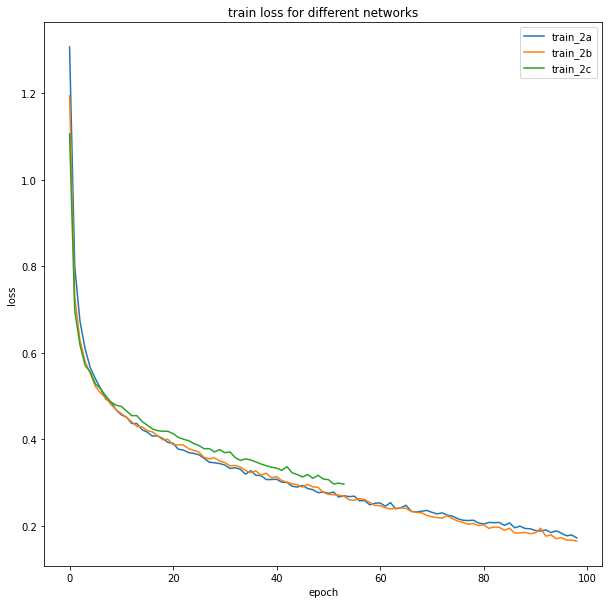

In [32]:
set_background(red_bgd)

# Plot using matplotlib
plt.figure(figsize = (10, 10))
plt.plot(train_2a['train_loss'][:-1])
plt.plot(train_2b['train_loss'][:-1])
plt.plot(train_2c['train_loss'][:-1])
plt.title('train loss for different networks')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_2a', 'train_2b', 'train_2c'])
plt.show()


# Discuss what you see
# The loss is nearly the same before epoch 10, then train_2b with n = 128 peformers better when epoch times increase. 

### 2.6 Plot Validation accuracies for the different shallow networks

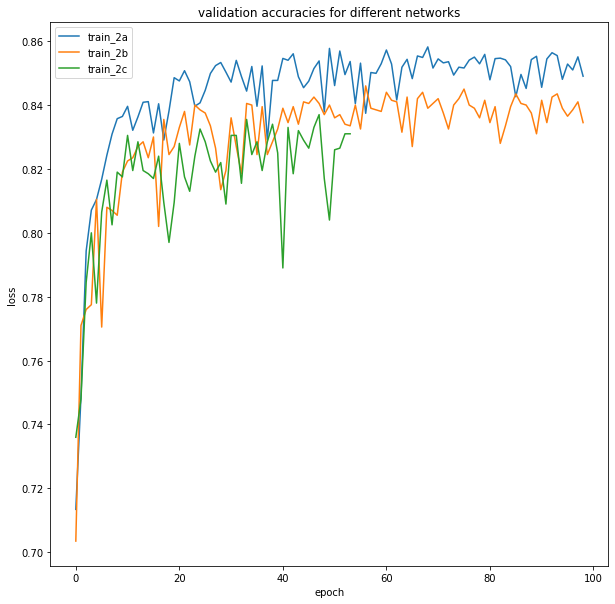

In [33]:
set_background(red_bgd)

# Plot using matplotlib

plt.figure(figsize = (10, 10))
plt.plot(train_2a['val_acc'][:-1])
plt.plot(train_2b['val_acc'][:-1])
plt.plot(train_2c['val_acc'][:-1])
plt.title('validation accuracies for different networks')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_2a', 'train_2b', 'train_2c'])
plt.show()

### 2.7 Visualize 5 predictions of test set along with groundtruths and input images for 3rd Shallow MLP

Restoring states from the checkpoint path at /work/logs_task_2c/epoch=47-step=3840.ckpt
Loaded model weights from checkpoint at /work/logs_task_2c/epoch=47-step=3840.ckpt
Predicting DataLoader 0: 100%|██████████| 600/600 [00:05<00:00, 117.58it/s]
The 0 image, predict label is 5, true label is 5
The 1 image, predict label is 9, true label is 9
The 2 image, predict label is 9, true label is 9
The 3 image, predict label is 3, true label is 3
The 4 image, predict label is 9, true label is 9


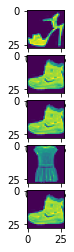

In [34]:
set_background(red_bgd)

# Generate predictions using predict function
pred = trainer_2c.predict(dataloaders = testloader)
test_loader_iter = iter(testloader)
test_data, test_labels = test_loader_iter.next()
labels = test_labels[0 : 5]
fig, ax = plt.subplots(5)
i = 0
for item in labels:
    ax[i].imshow(test_data[item].reshape(28, 28))
    print(f'The {i} image, predict label is {pred[0][1][item]}, true label is {pred[0][0][item]}')
    i = i + 1
# visualize predictions along with ground truths and input images using matplotlib


### 2.8 Optimize hyper-parameters to improve accuracy of shallow network

What do you recommend to improve shallow network's accuracy further ?

- Make sure to test at least 2-3 hyper parameters
- For each hyper parameter, have 3 variations
- Plot out the results after you train + tested it. It is recommended to use subplot (or overlay onto 1 plot the accuracies for each model). **Important! Think about which accuracy is most relevant** 

In [35]:
set_background(red_bgd)

# What do you recommend?
# I suugest learning rate is 1e-1(tested 1e-1, 1e-2, 1e-3), number of epoch is 160(tested 60, 120, 160, 180).
# And for optimizer I choose SGD.

Train and test the Shallow MLP model using above suggested. When testing different hyper-parameters, you can use the original shallow MLP class from earlier, and just train using the different hyper-parameters. Save your MLP with the optimized parameters. 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 100 K 
2 | linear2        | Linear           | 1.3 K 
3 | train_accuracy | Accuracy         | 0     
4 | val_accuracy   | Accuracy         | 0     
5 | test_accuracy  | Accuracy         | 0     
----------------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)
Epoch 0:  80%|████████  | 80/100 [00:01<00:00, 47.49it/s, loss=0.843, v_num=6]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|████████  | 80/100 [00:02<00:00, 35.32it/s, loss=0.674, v_num=6, val_loss=0.824, val_acc=0.697, train_loss=1.190, train_acc=0.619]
Validation: 0it [00:00, ?it/s]
E

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

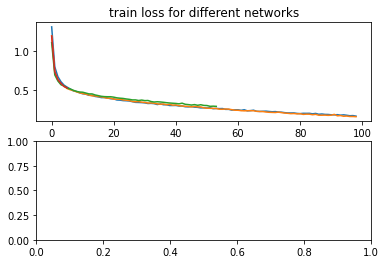

In [36]:
set_background(red_bgd)

# Create New Class
# class Shallow_MLP_Optimized(LightningModule):
# Using original shallow MLP 

# Train the model
model = Shallow_MLP(128)

checkpoint_callback_Opt = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_opt/',
    monitor = 'val_acc',
    mode = 'max')

trainer_opt = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  
    max_epochs=160,
    callbacks=[TQDMProgressBar(refresh_rate=20),checkpoint_callback_Opt],
    logger=CSVLogger(save_dir="logs_task_2b/"),
)

# Test the model
trainer_opt.fit(model)
trainer_opt.test()

# Visualize accuracy graphs and compare it with 2.3 Accuracies
train_opt = pd.read_csv(trainer_opt.logger.log_dir + '/metrics.csv')
train_opt.set_index('epoch', inplace = True)
train_opt = train_opt.groupby(level = 0).sum().drop('step', axis = 1)

fig, ax = plt.subplots(2)
ax[0].plot(train_2a['train_loss'][:-1])
ax[0].plot(train_2b['train_loss'][:-1])
ax[0].plot(train_2c['train_loss'][:-1])
ax[0].plot(train_opt['train_loss'][:-1])
ax[0].set_title('train loss for different networks')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(['train_2a', 'train_2b', 'train_2c', 'train_opt'])

ax[1].plot(train_2a['val_acc'][:-1])
ax[1].plot(train_2b['val_acc'][:-1])
ax[1].plot(train_2c['val_acc'][:-1])
ax[1].plot(train_2c['train_opt'][:-1])
ax[1].set_title('validation loss for different networks')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(['train_2a', 'train_2b', 'train_2c', 'train_opt'])

plt.show()


# Section 3: Deep MLP

### 3.1 Design Deep MLP

Design a Deep MLP with four linear layers.

In [ ]:
set_background(red_bgd)


class Deep_MLP(LightningModule):
    def __init__(self, n1, n2, n3, learning_rate=1e-1):
        super().__init__()
        
        self.learning_rate = learning_rate
        self.loss_fun = nn.CrossEntropyLoss() # Use CE loss
        
        self.linear1 =  nn.Linear(784, n1)
        self.linear2 =  nn.Linear(n1, n2)
        self.linear3 =  nn.Linear(n2, n3)
        self.linear4 =  nn.Linear(n3, 10)
        
        self.train_accuracy = Accuracy()
        self.val_accuracy = Accuracy()
        self.test_accuracy = Accuracy()
            
    def forward(self, x):
        #Pass input through conv layers
        bs = x.shape[0]
        x = x.reshape(bs, -1).float()
        out1 = torch.tanh(self.linear1(x))
        out2 = torch.tanh(self.linear2(out1))
        out3 = torch.tanh(self.linear3(out2))
        out4 = self.linear4(out3)
      
        return out4
    
    def training_step(self, batch, batch_idx):
        # Write training step
        x, y = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)
        pred = logits.argmax(1)
        self.train_accuracy.update(pred, y)

        self.log("train_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("train_acc", self.train_accuracy, prog_bar = True, on_step = False, on_epoch = True)
        return loss

    def validation_step(self, batch, batch_idx):
        # Write validation step
        x, y = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)
        pred = logits.argmax(1)
        self.val_accuracy.update(pred, y)

        self.log("val_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("val_acc", self.val_accuracy, prog_bar = True, on_step = False, on_epoch = True)

    def test_step(self, batch, batch_idx):
        # Write testing step
        x, y = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)
        pred = logits.argmax(1)
        self.test_accuracy.update(pred, y)

        self.log("test_loss", loss, prog_bar = True, on_step = False, on_epoch = True)
        self.log("test_acc", self.test_accuracy, prog_bar = True, on_step = False, on_epoch = True)
        
    def predict_step(self, batch, batch_idx):
        # Write predict step
        x, y = batch
        logits = self(x)
        preds = logits.argmax(1)
        return [preds, y]

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    def train_dataloader(self):
        return trainloader
    
    def val_dataloader(self):
        return valloader

    def test_dataloader(self):
        return testloader

### 3.2 Train and evaluate model's performance for following scenarios

a. fc1 : Linear(784 $\times$ 128) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(128 $\times$ 64) $\rightarrow$ ReLU $\rightarrow$ fc3 : Linear(64 $\times$ 32) ->$\rightarrow$ Relu $\rightarrow$ fc4 : Linear(32 $\times$ 10)

b. fc1 : Linear(784 $\times$ 32) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(32 $\times$ 64) $\rightarrow$ ReLU $\rightarrow$ fc3 : Linear(64 $\times$ 128) $\rightarrow$ Relu $\rightarrow$ fc4 : Linear(128 $\times$ 10)

c. fc1 : Linear(784 $\times$ 64) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(64 $\times$ 64) $\rightarrow$ ReLU $\rightarrow$ fc3 : Linear(64 $\times$ 64) $\rightarrow$ Relu $\rightarrow$ fc4 : Linear(64 $\times$ 10)

Note: Make sure to have different log file directories (eg: logs_task_3a, logs_task_3b and logs_task_3c)

In [ ]:
set_background(red_bgd)


# Initialize Deep MLP model for scenario 3a
model = Deep_MLP(n1 = 128, n2 = 64, n3 = 32)

# Define checkpoint callback function to save best model
checkpoint_callback_3a = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_3a/',
    monitor = 'val_acc',
    mode = 'max')

# Train and Test Model
trainer_3a = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  
    max_epochs=100,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_3a],
    logger=CSVLogger(save_dir="logs_task_3a/"),
)
trainer_3a.fit(model)
trainer_3a.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 100 K 
2 | linear2        | Linear           | 8.3 K 
3 | linear3        | Linear           | 2.1 K 
4 | linear4        | Linear           | 330   
5 | train_accuracy | Accuracy         | 0     
6 | val_accuracy   | Accuracy         | 0     
7 | test_accuracy  | Accuracy         | 0     
----------------------------------------------------
111 K     Trainable params
0         Non-trainable params
111 K     Total params
0.445     Total estimated model params size (MB)
                                                                            /usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:225: PossibleUserWarnin

[{'test_loss': 0.4200780987739563, 'test_acc': 0.8558499813079834}]

If your implementation is correct, you should obtain a printed output similar to this:

[{'test_loss': 0.4924968481063843, 'test_acc': 0.8584499955177307}]

In [ ]:
set_background(red_bgd)

# Initialize Deep MLP model for scenario 3b
model = Deep_MLP(n1 = 32, n2 = 64, n3 = 128)

# Define checkpoint callback function to save best model
checkpoint_callback_3b = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_3b/',
    monitor = 'val_acc',
    mode = 'max')

# Train and Test Model
trainer_3b = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  
    max_epochs=100,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_3b],
    logger=CSVLogger(save_dir="logs_task_3b/"),
)
trainer_3b.fit(model)
trainer_3b.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 25.1 K
2 | linear2        | Linear           | 2.1 K 
3 | linear3        | Linear           | 8.3 K 
4 | linear4        | Linear           | 1.3 K 
5 | train_accuracy | Accuracy         | 0     
6 | val_accuracy   | Accuracy         | 0     
7 | test_accuracy  | Accuracy         | 0     
----------------------------------------------------
36.8 K    Trainable params
0         Non-trainable params
36.8 K    Total params
0.147     Total estimated model params size (MB)
Epoch 0:  80%|████████  | 80/100 [00:01<00:00, 60.00it/s, loss=1.11, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|████████  | 80/100 [00:01<00:00, 66.63it/s, loss=0.764, v_num=0, val_l

[{'test_loss': 0.44770342111587524, 'test_acc': 0.8534666895866394}]

If your implementation is correct, you should obtain a printed output similar to this:
    
[{'test_loss': 0.4536038041114807, 'test_acc': 0.8570333123207092}]

In [ ]:


# Initialize Deep MLP model for scenario 4c
model = Deep_MLP(n1 = 64, n2 = 64, n3 = 64)

# Define checkpoint callback function to save best model
checkpoint_callback_3c = ModelCheckpoint(
    every_n_epochs=1,
    save_top_k = 1,
    dirpath = 'logs_task_3c',
    monitor = 'val_acc',
    mode = 'max')

# Train and Test Model
trainer_3c = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=100,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_3c],
    logger=CSVLogger(save_dir="logs_task_3c/"),
)
trainer_3c.fit(model)
trainer_3c.test()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 50.2 K
2 | linear2        | Linear           | 4.2 K 
3 | linear3        | Linear           | 4.2 K 
4 | linear4        | Linear           | 650   
5 | train_accuracy | Accuracy         | 0     
6 | val_accuracy   | Accuracy         | 0     
7 | test_accuracy  | Accuracy         | 0     
----------------------------------------------------
59.2 K    Trainable params
0         Non-trainable params
59.2 K    Total params
0.237     Total estimated model params size (MB)
Epoch 0:  80%|████████  | 80/100 [00:01<00:00, 65.37it/s, loss=1.21, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|████████  | 80/100 [00:01<00:00, 67.04it/s, loss=0.849, v_num=0, val_l

[{'test_loss': 0.44977205991744995, 'test_acc': 0.8592000007629395}]

If your implementation is correct, you should obtain a printed output similar to this:
    
[{'test_loss': 0.40754958987236023, 'test_acc': 0.8532999753952026}]

### 3.3 Plot Training loss vs Validation loss for the different deep networks

In [ ]:
set_background(red_bgd)


# read logs for 3a
train_3a = pd.read_csv(trainer_3a.logger.log_dir + '/metrics.csv')
train_3a.set_index('epoch', inplace = True)
train_3a = train_3a.groupby(level = 0).sum().drop('step', axis = 1)
# read logs for 3b
train_3b = pd.read_csv(trainer_3b.logger.log_dir + '/metrics.csv')
train_3b.set_index('epoch', inplace = True)
train_3b = train_3b.groupby(level = 0).sum().drop('step', axis = 1)
# read logs for 3c
train_3c = pd.read_csv(trainer_3c.logger.log_dir + '/metrics.csv')
train_3c.set_index('epoch', inplace = True)
train_3c = train_3c.groupby(level = 0).sum().drop('step', axis = 1)

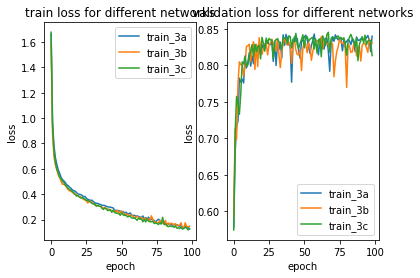

In [ ]:
set_background(red_bgd)

# Plot using matplotlib, you can overlay the graphs.

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
ax[0].plot(train_3a['train_loss'][:-1])
ax[0].plot(train_3b['train_loss'][:-1])
ax[0].plot(train_3c['train_loss'][:-1])
ax[0].set_title('train loss for different networks')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(['train_3a', 'train_3b', 'train_3c'])

ax[1].plot(train_3a['val_acc'][:-1])
ax[1].plot(train_3b['val_acc'][:-1])
ax[1].plot(train_3c['val_acc'][:-1])
ax[1].set_title('validation loss for different networks')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(['train_3a', 'train_3b', 'train_3c'])

plt.show()


### 3.4 Visualize 5 predictions of test set along with groundtruths and input images for 3rd Deep MLP

In [ ]:
set_background(red_bgd)

# Generate predictions using predict function
pred = trainer_3c.predict(dataloaders = testloader)
test_loader_iter = iter(testloader)
test_data, test_labels = test_loader_iter.next()
labels = test_labels[0 : 5]
fig, ax = plt.subplots(5)
i = 0
for item in labels:
    ax[i].imshow(test_data[item].reshape(28, 28))
    print(f'The {i} image, predict label is {pred[0][1][item]}, true label is {pred[0][0][item]}')
    i = i + 1

# visualize predictions along with ground truths and input images using matplotlib


### 3.5 Discussion:

In [ ]:
set_background(red_bgd)

# Question: Did you observe a strange behaviour for the deep MLPs? If yes, what is that ? Discuss what might be the source of that.

#  I ovserve that deep 
# learning algorithms scale with data, whereas shallow learning converges.
# Deep MLP overfit the data cause validation loss increase a li in the middle. Because there're 
# more hidden layers.

In [ ]:
set_background(red_bgd)

# Question: How does the deep MLP compare with the shallow MLP for this case?

# The performance in this case are quite similar.
# Deeper CNNs perform better than shallow models over deeper datasets. 
# In contrast, shallow architectures perform better than deeper architectures for wider datasets. 
# In this case, there's no big difference.

# Do not remove or edit the following code snippet. 

When submitting your report, please ensure that you have run the entire notebook from top to bottom. You can do this by clicking "Kernel" and "Restart Kernel and Run All Cells". Make sure the last cell (below) has also been run. 

In [38]:
file_name = str(student_number) + 'Lab_3_Student'
cmd = "jupyter nbconvert --to script Lab_3_Student.ipynb --output " + file_name
if(os.system(cmd)):
    print("Error converting to .py")
    print("cmd")

[NbConvertApp] Converting notebook Lab_3_Student.ipynb to script
[NbConvertApp] Writing 50581 bytes to 31975658Lab_3_Student.py


<div class="alert alert-block alert-warning">
    
# <center> That is all for this Lab!
    
</div>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d2fb295-8614-43a6-8c1c-767d79eb0e26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>